In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab
import math as m
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [226]:
df=pd.read_csv('D:/beginner_datasets/New folder/CTSCAN.csv')
df

,Age,Organs,Type,Time taken
0,12,brain,normal,28
1,58,brain,normal,26
2,28,abdomen,contrast,84
3,20,lungs,normal,24
4,19,pelvis,contrast,58
...,...,...,...,...
94,69,abdomen,normal,31
95,29,abdomen,normal,36
96,39,brain,contrast,50
97,64,pelvis,normal,29


In [227]:
df.describe()

,Age,Time taken
count,99.000000,99.000000
mean,40.757576,47.909091
std,16.942334,21.212285
min,12.000000,20.000000
25%,28.000000,29.000000
50%,40.000000,45.000000
75%,54.000000,61.500000
max,70.000000,94.000000


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         99 non-null     int64 
 1   Organs      99 non-null     object
 2   Type        99 non-null     object
 3   Time taken  99 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [229]:
df.Organs.unique()

array(['brain', 'abdomen', 'lungs', 'pelvis'], dtype=object)

In [230]:
df['Organs'].value_counts()

brain      28
lungs      25
abdomen    23
pelvis     23
Name: Organs, dtype: int64

In [231]:
df['Type'].value_counts()

contrast    51
normal      48
Name: Type, dtype: int64

<AxesSubplot:xlabel='Time taken', ylabel='Density'>

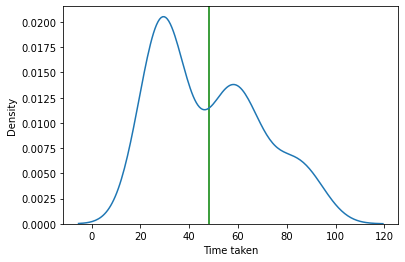

In [232]:
plt.axvline(df['Time taken'].mean(),c='green')
sns.kdeplot(df['Time taken'])

In [233]:
corr = df.corr()
corr

,Age,Time taken
Age,1.000000,-0.004406
Time taken,-0.004406,1.000000


<AxesSubplot:>

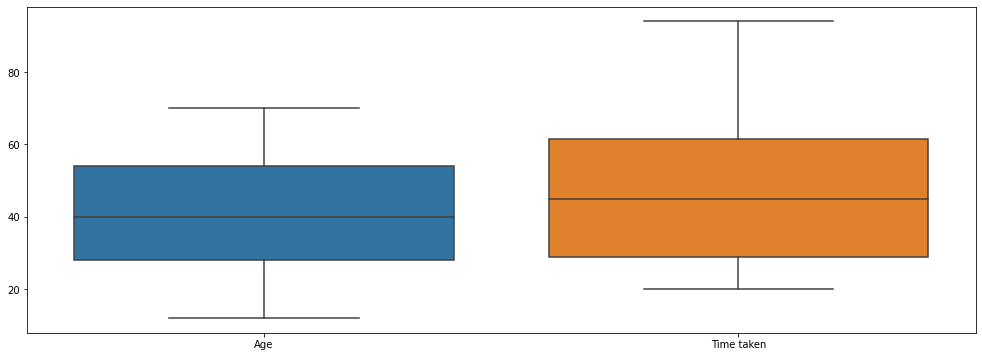

In [234]:
a4_dims = (17, 6)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,data=df)

In [235]:
df1 = pd.get_dummies(df)
df1

,Age,Time taken,Organs_abdomen,Organs_brain,Organs_lungs,Organs_pelvis,Type_contrast,Type_normal
0,12,28,0,1,0,0,0,1
1,58,26,0,1,0,0,0,1
2,28,84,1,0,0,0,1,0
3,20,24,0,0,1,0,0,1
4,19,58,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
94,69,31,1,0,0,0,0,1
95,29,36,1,0,0,0,0,1
96,39,50,0,1,0,0,1,0
97,64,29,0,0,0,1,0,1


In [236]:
x=df1.drop(['Time taken'],axis=1)
y=df1['Time taken']

In [237]:
x.head()

,Age,Organs_abdomen,Organs_brain,Organs_lungs,Organs_pelvis,Type_contrast,Type_normal
0,12,0,1,0,0,0,1
1,58,0,1,0,0,0,1
2,28,1,0,0,0,1,0
3,20,0,0,1,0,0,1
4,19,0,0,0,1,1,0


In [238]:
y.head()

0    28
1    26
2    84
3    24
4    58
Name: Time taken, dtype: int64

In [239]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.35,random_state= 42)

In [240]:
X_train.shape

(64, 7)

In [241]:
y_train.shape

(64,)

In [242]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [243]:
nscore1=clf.score(X_train, y_train)
nscore2=clf.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(nscore1*100))
print("Test set accuracy: ", '%.3f'%(nscore2*100))

Training set accuracy:  65.625
Test set accuracy:  5.714


In [244]:
from sklearn.tree import  DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion = 'entropy', splitter='best')
model3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [245]:
Dscore1 = model3.score(X_train, y_train)
Dscore2 = model3.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(Dscore1*100))
print("Test set accuracy: ", '%.3f'%(Dscore2*100))

Training set accuracy:  92.188
Test set accuracy:  5.714


In [246]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier(n_estimators=100 , random_state=0)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [247]:
Rscore1 = model2.score(X_train, y_train)
Rscore2 = model2.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(Rscore1*100))
print("Test set accuracy: ", '%.3f'%(Rscore2*100))

Training set accuracy:  92.188
Test set accuracy:  8.571
